# Random Walks and Sequences

Suppose that I start at position 0 on the number line. Every second I either move to the right (with probability $p$) or to the left (with probability $q=1-p$).  How likely is it that I will ever visit position 0 again?  How far from 0 am I, on average, after $n$ seconds?  What if instead of walking on a line, I started at position $(0,0)$ in the plane and each second I moved north, south, east, or west randomly?

Probabilistic processes like these are called discrete time [random walks](https://en.wikipedia.org/wiki/Random_walk).  They are heavily studied both for theoretical interest and for their applications in real-world situations.  In this project you will study one and two-dimensional random walks, plot their trajectories, and investigate mean distances from the origin, and look at randomized versions of the Fibonacci sequence.  You'll practise using Python's `random` module as well as `matplotlib` for plotting and you'll learn to use `scipy`'s `curve_fit` method for parameter estimation.  This project may look shorter than some of the others, but there is quite a bit of plotting and reading of documentation to be done.

## Part 1 - one-dimensional random walks

Consider the sequence $x_0, \ldots, x_m$ where $x_0= 0$ and 

$$x_{i+1} = \begin{cases} x_i + 1 & \text{with probability } p\\
x_i - 1 & \text{with probability } 1-p \end{cases}$$

**Write a function `random_walk(m, p)` which returns a list of values `[x0, x1, x2, ..., xm]` generated in this way.**

In [2]:
from numpy import random
import matplotlib.pyplot as plt
import numpy as np

def random_walk(m, p):
    x = [0]
    for i in range(m):
        delta = random.choice([1,-1], p = [p,1-p])
        x_ip1 = x[i] + delta
        x.append( x_ip1 )
    return x

To generate an event with probability $p$ you could use [`scipy.stats.bernoulli`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bernoulli.html), or [`numpy.random.binomial`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.binomial.html) with `n = 1`, or [`random.random()`](https://docs.python.org/3.7/library/random.html#random.random) which produces a uniformly distributed random number in $[0,1)$, so the probability it is less than $p$ is $p$, or one of the numpy randomization functions.

**Use `plt.plot` to plot the points $(i, x_i)$ for $0 \leq i \leq 1000$ where the $x_i$ are generated by `random_walk(1000, p)` for `p=0.5` and `p=0.7`** (on separate axes).

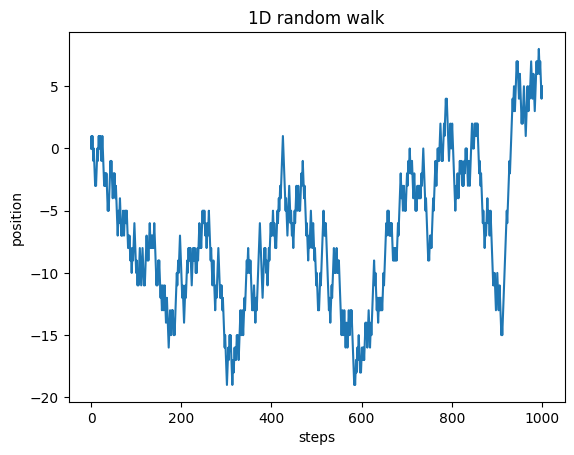

In [3]:

xs = np.linspace(0,1000,1000)
#print(len(xs))
ys = random_walk(999,0.5)
#print(len(ys))
figure, ax = plt.subplots()
plt.plot(xs,ys)
ax.set_title("1D random walk")
ax.set_xlabel("steps")
ax.set_ylabel("position")
plt.show()

1000
1000


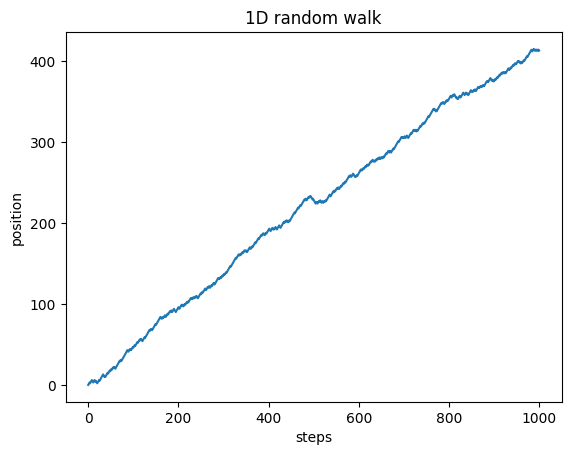

In [4]:

xs = np.linspace(0,1000,1000)
print(len(xs))
ys = random_walk(999,0.7)
print(len(ys))
figure, ax = plt.subplots()
plt.plot(xs,ys)
ax.set_title("1D random walk")
ax.set_xlabel("steps")
ax.set_ylabel("position")
plt.show()

Write a program that uses `random_walk(m, p)` to generate 1000 random walks with `m=1000` and outputs how many of them revisit 0, divided by 1000 - this is an estimate of the probability of revisiting 0.  Do this for `p=0.5, p=0.6`, and `p=0.4`. 

In [5]:
def prob(m,p):
    list=[]
    list = random_walk(m,p)
    len_list = list.count(0)
    return len_list/1000
#ew


In [6]:

for p in [0.4,0.5, 0.6]:
    print(f"P(0) for p={p}: {prob(999, p):.4f}")

P(0) for p=0.4: 0.0070
P(0) for p=0.5: 0.0300
P(0) for p=0.6: 0.0050


In [7]:

x1 = random_walk(999,0.5)

x1.count(0) / 1000

0.004

## Part 2 - two-dimensional random walks

Now you are going to generate a two-dimensional random walk.  This will start at $(0,0)$ and at every step move north, south, east, or west each with probability $1/4$.  In other words you will generate a sequence $(x_i, y_i)$ such that $(x_0, y_0)=(0,0)$ and

$$ (x_{i+1}, y_{i+1}) = \begin{cases}
(x_i, y_i) + (0, 1) & \text{with probability } 1/4 \\
(x_i, y_i) + (0, -1) & \text{with probability } 1/4 \\
(x_i, y_i) + (1, 0) & \text{with probability } 1/4 \\
(x_i, y_i) + (-1, 0) & \text{with probability } 1/4. \end{cases}
$$

Write a function `random_walk_2d(n)` that produces a list or numpy array of the coordinates of a `n`-step two-dimensional random walk as defined above.  Generate a 1000-step two-dimensional random walk and plot the points $(x_i, y_i)$, connecting each $(x_i,y_i)$ to $(x_{i+1}, y_{i+1})$ with a straight line.  You could use `plt.plot` for this, or any other method that works in a standard Anaconda installation.

In [8]:
def random_walk_2d(n):
    xy = [(0,0)]
    for i in range(n):
        deltav = [(0,1),(0,-1),(1,0),(-1,0)]
        delta = random.choice([0,1,2,3], p = [0.25,0.25,0.25,0.25])
        d = (deltav[delta])
        m = xy[i] 
        k = (m[0]+d[0] , m[1]+d[1])
        xy.append(k)
    return xy

Text(0, 0.5, 'y position')

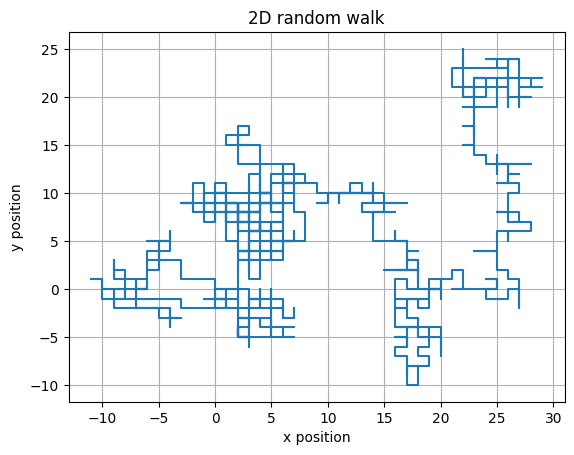

In [9]:
# plotting code here
n = 999
points = random_walk_2d(n)
xs = []
ys = []
for i in range(1000):
    m = points[i]
    xs.append(m[0])
    ys.append(m[1])
#len(xs) == len(ys) works lol
figure, axes = plt.subplots()
plt.plot(xs,ys)
plt.grid()
plt.title("2D random walk")
plt.xlabel("x position")
plt.ylabel("y position")


Now generate - but don't plot - 500 two-dimensional random walks of 1000 steps, and for each of your 500 walks, product a list or numpy array of the distance from the origin after $i$ steps for each $0 \leqslant i \leqslant 1000$.  Combine these into a single array whose $i$th entry is the average over all 500 walks of the distance from the origin after $i$ steps, and plot this average distance against $i$ (this will probably be easier if your data is in a numpy array rather than a list).

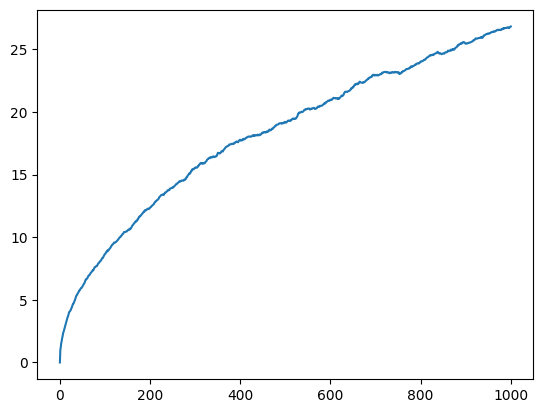

In [10]:
biglist = []
for i in range(500):
    pts = random_walk_2d(n)
    minilist = []
    for i in range(1000):
        xd = (pts[i])[0]
        yd = (pts[i])[1]
        d = (xd**2 +yd**2)**0.5
        minilist.append(d)
    biglist.append(minilist)

avg_list = []
for i in range(1000):
    x = 0
    for j in range(500):
        x = x + (biglist[j])[i]
    x_avg = x/500
    avg_list.append(x_avg)

xs = np.linspace(0,1000,1000)
ys = np.array(avg_list)

figure, axes = plt.subplots()
plt.plot(xs,ys)

#meh


Now read the documentation for the [`scipy.optimize/curve_fit` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) (it's complicated! look at the examples to get an idea of what is going on, and search the web or ask an AI for help).  Use it to find numbers $C$ and $e$ such that the curve $y = C x ^e$ (where $x$ is the number of steps and $y$ is the distance from the origin) fits the average distance data you just found as well as possible.  Plot both the average distance data and the curve of best fit on the same axes.

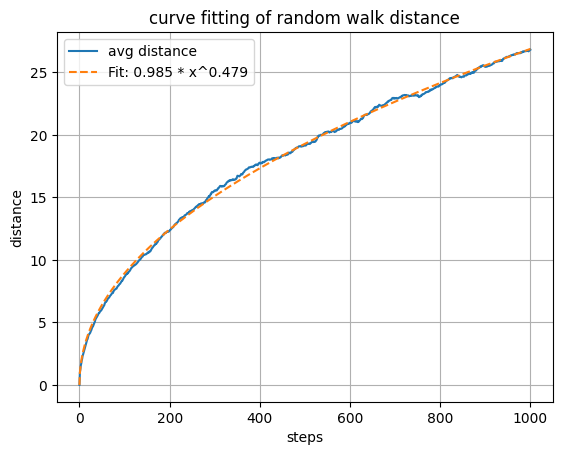

optimized parameters: C = 0.985, e = 0.479


In [ ]:

from scipy.optimize import curve_fit

def fit_func(x, c, e):
    return c * x**e

params, _ = curve_fit(fit_func, xs, avg_list)
C_opt, e_opt = params


plt.plot(xs, avg_list, label="avg distance")
plt.plot(xs, fit_func(xs, C_opt, e_opt), label=f"Fit: {C_opt:.3f} * x^{e_opt:.3f}", linestyle="--")
plt.title("curve fitting of random walk distance")
plt.xlabel("steps")
plt.ylabel("distance")
plt.legend()
plt.grid()
plt.show()

print(f"optimized parameters: C = {C_opt:.3f}, e = {e_opt:.3f}")




## Part 3 - Randonacci sequences

The Fibonacci sequence $(f_n)$ is defined by $f_0 = 0, f_1 = 1$, and $f_{n+2} = f_{n+1} + f_n$ for $n \geqslant 0$.  This part is about versions of the Fibonacci sequence called *randonacci sequences* where the recurrence relation is randomized.

The simplest one of these is defined by $g_0 = 0, g_1 = 1$, and for $n\geqslant 0$
$$ g_{n+2} = g_{n+1} + s_n g_n $$
where the terms $s_n$ are $1$ or $-1$, each one chosen independently with probability 1/2.  For example, if $s_0=-1, s_1=1, s_2=1, s_3=-1$ then the sequence $(g_n)$ would be $g_2 = g_1 - g_0, g_3 = g_2 + g_1, g_4 = g_3+g_2, g_5 = g_4-g_3, \ldots$

Write a function `randonacci(n)` that returns a list of `n` terms from the sequence $(g_n)$ defined above.  It is known that the Fibonacci sequence grows geometrically: $f_n^{1/n} \to (1+\sqrt{5})/2$ as $n \to \infty$.  Plot three of the sequences $(|g_n|^{1/n})$ on the same axes, for $50 \leqslant n \leqslant 1000$, and find a way to estimate their common limit.  Is it the same as the limit for $f_n$?

In [12]:
def randonacci(n):
    seq = []
    f0 = 0
    f1 = 1
    fn = f0
    fnp1 = f1
    seq.append(f0)
    seq.append(f1)
    for i in range(0,n):
        sn = int(random.choice([1,-1], p = [0.5,0.5]))
        fnp2 = (fnp1) + (sn)*fn
        fn = fnp1
        fnp1 = fnp2
        seq.append(fnp2)
    return seq



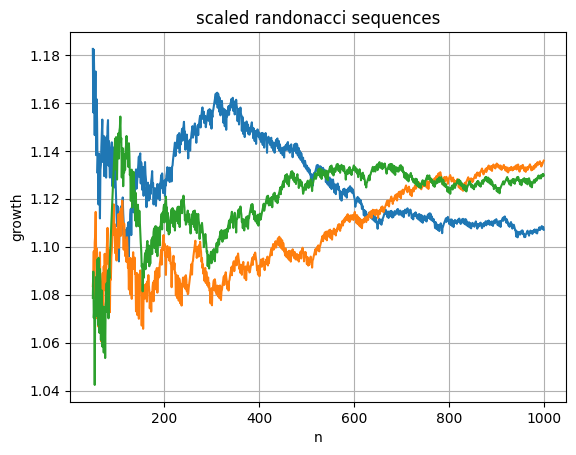

1.1243143232793078


-0.4937196654705871

In [13]:
xs = np.linspace(0,1000,1000)
ys1 = randonacci(len(xs)-2)
ys2 = randonacci(len(xs)-2)
ys3 = randonacci(len(xs)-2)

ys1c= [ys1[0]]
ys2c = [ys2[0]]
ys3c=[ys3[0]]

for (i) in range(len(ys1)-1):
    i +=1
    ys1c.append(abs(ys1[i]) **(1/i))
    ys2c.append(abs(ys2[i]) **(1/i))
    ys3c.append(abs(ys3[i]) **(1/i))


figure, axes = plt.subplots()
plt.plot(xs[49:],ys1c[49:])
plt.plot(xs[49:],ys2c[49:])
plt.plot(xs[49:],ys3c[49:])
plt.title("scaled randonacci sequences")
plt.xlabel("n")
plt.ylabel("growth")
plt.grid()
plt.show()

#from sympy import limit, dont bother 


avg = 0
for i in range(700,1000):
    sum = (ys1c[i]) + (ys2c[i]) + (ys3c[i])
    avg = (avg + (sum/3))/2
print(avg)
avg - (1+ 5**0.5)/2


Next we'll consider an even more randomized version of the Fibonacci sequence.  For a fixed number $\beta$ we define $h_0 = 0, h_1 = 1$, and 
$$ h_{n+2} = s_n h_{n+1} + t_n \beta h_n$$
where $s_n$ and $t_n$ are 1 or -1, each one chosen independently at random with probability 1/2.

The sequence $h_n$ has a special property: depending on the value of $\beta$, it either decays to zero or diverges to infinity.  Plot examples of the series $h_n$ against $n$ for $0\leqslant n \leqslant 500$ and $\beta = 0.4, 0.6, 0.8$ on separate axes.  Try to locate the value of $\beta$ where the behaviour of $h_n$ changes from  tending to zero to diverging to $\pm \infty$.

In [14]:
def randonacci2(n, beta):
    seq = []
    h0 = 0
    h1 = 1
    hn = h0
    hnp1 = h1
    seq.append(h0)
    seq.append(h1)
    for i in range(0,n):
        sn = int(random.choice([1,-1], p = [0.5,0.5]))
        tn = int(random.choice([1,-1], p = [0.5,0.5]))
        hnp2 = sn*(hnp1) + (tn)*beta*hn
        hn = hnp1
        hnp1 = hnp2
        seq.append(hnp2)
    return seq




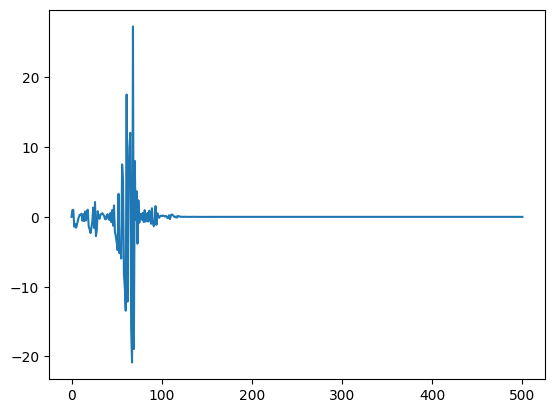

In [15]:
xs = np.linspace(0,500,500)
ys1 = randonacci2(len(xs)-2, 0.4)


figure, axes = plt.subplots()
plt.plot(xs,ys1)

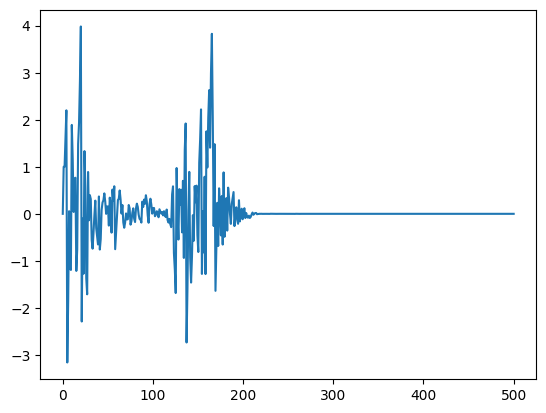

In [16]:
xs = np.linspace(0,500,500)
ys1 = randonacci2(len(xs)-2, 0.6)

#
figure, axes = plt.subplots()
plt.plot(xs,ys1)

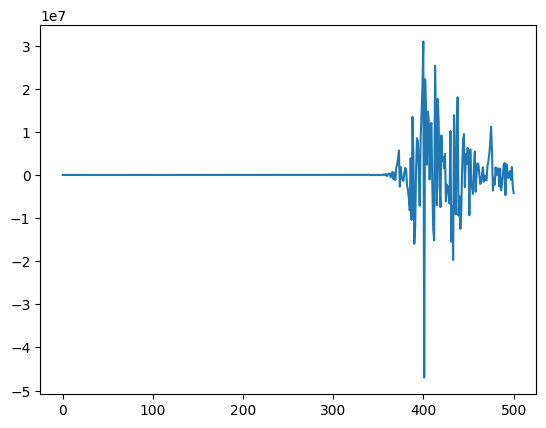

In [17]:
xs = np.linspace(0,500,500)
ys1 = randonacci2(len(xs)-2, 0.8)


figure, axes = plt.subplots()
plt.plot(xs,ys1)
